In [1]:
import pandas as pd
import re
import sklearn
!pip install category_encoders
import category_encoders as ce
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 81kB 3.2MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("./train.csv")

In [10]:
df[df['Embarked'] == 'C'].groupby('Pclass')['Fare'].mean().round(2)

Pclass
1    104.72
2     25.36
3     11.21
Name: Fare, dtype: float64

In [8]:
df[df['Embarked'] == 'Q'].groupby('Pclass')['Fare'].mean().round(2)

Pclass
1    90.00
2    12.35
3    11.18
Name: Fare, dtype: float64

In [9]:
df[df['Embarked'] == 'S'].groupby('Pclass')['Fare'].mean().round(2)

Pclass
1    70.36
2    20.33
3    14.64
Name: Fare, dtype: float64

In [11]:
{
 (1,'C'): 104.72,
 (2,'C'): 25.36,
 (3,'C'): 11.21,
 (1,'Q'): 90.00,
 (2,'Q'): 12.35,
 (3,'Q'): 11.18,
 (1,'S'): 70.36,
 (2,'S'): 20.33,
 (3,'S'): 14.64
}

{(1, 'C'): 104.72,
 (1, 'Q'): 90.0,
 (1, 'S'): 70.36,
 (2, 'C'): 25.36,
 (2, 'Q'): 12.35,
 (2, 'S'): 20.33,
 (3, 'C'): 11.21,
 (3, 'Q'): 11.18,
 (3, 'S'): 14.64}

In [3]:
df['Title'] = df['Name'].apply(lambda x: re.findall("[A-Za-z]+\.",x)[0])

In [133]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [99]:
df[['Capt.','Col.','Countess.','Don.','Dr.','Jonkheer.','Lady','Major.','Master.',\
    'Miss.','Mlle.','Mme.','Mr.','Mrs.','Ms.','Rev.','Sir.']] = pd.get_dummies(df['Title'])

In [4]:
ce_OHE = ce.OneHotEncoder(cols=['Title'])
df = ce_OHE.fit_transform(df)
df.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Title_7,Title_8,Title_9,Title_10,Title_11,Title_12,Title_13,Title_14,Title_15,Title_16,Title_17
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
le = LabelEncoder()
df['Title_Cat'] = le.fit_transform(df[['Title']])
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,12
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,13
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,9
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,13
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,12


In [5]:
df['Total_Family_Members'] = df['SibSp'] + df['Parch'] + 1

In [6]:
df['AgeTimesPclass'] = df['Age'] * df['Pclass']

In [39]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Total_Family_Members,AgeTimesPclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,105.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.,0,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.,0,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master.,4,6.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.,2,81.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs.,1,28.0


In [7]:
df[['female','male']] = pd.get_dummies(df['Sex'])

In [8]:
df[["C","Q","S"]] = pd.get_dummies(df['Embarked'])

In [9]:
drop_features = ['PassengerId','Name','Sex','Title','Ticket','Cabin','Embarked']
df.drop(drop_features,inplace=True,axis=1)

In [10]:
df.fillna(method="ffill",inplace=True)

In [11]:
df.isnull().sum()

Survived                0
Pclass                  0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
Title_Cat               0
Total_Family_Members    0
AgeTimesPclass          0
female                  0
male                    0
C                       0
Q                       0
S                       0
dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,'Pclass':],df.Survived,\
                                                    test_size=0.1)

In [13]:
model = LogisticRegression()

In [14]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_predictions = model.predict(x_test)

In [16]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        48
           1       0.69      0.74      0.71        42

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



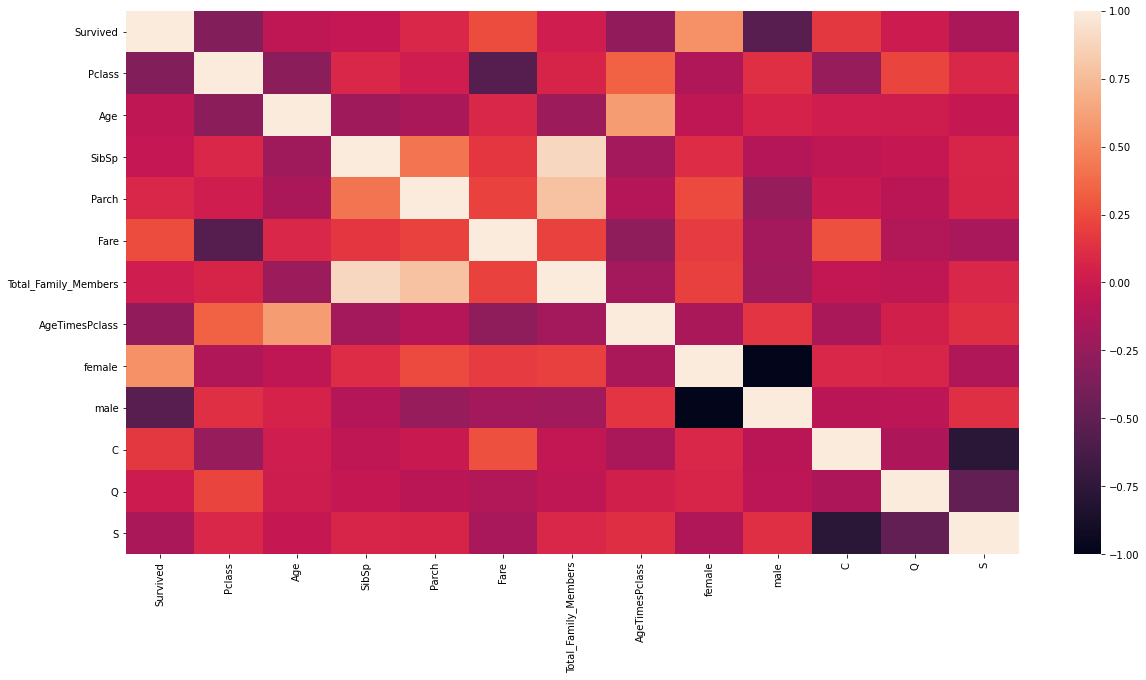

In [65]:
plt.figure(figsize=(20,10))
sb.heatmap(df.corr())

In [17]:
df_test = pd.read_csv("./test.csv")
df_test[['female','male']] = pd.get_dummies(df_test['Sex'])
df_test[["C","Q","S"]] = pd.get_dummies(df_test['Embarked'])
df_test['Title'] = df_test['Name'].apply(lambda x: re.findall('[A-Za-z]+\.',x)[0])
#ce_OHE = ce.OneHotEncoder(cols=['Title'])
#df_test = ce_OHE.fit_transform(df_test)
le = LabelEncoder()
df_test['Title_Cat'] = le.fit_transform(df_test[['Title']])
df_test['Total_Family_Members'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['AgeTimesPclass'] = df_test['Age'] * df_test['Pclass']
df_test.fillna(method="ffill",inplace=True)
drop_features = ['Sex','Title','Ticket','Name','Cabin',"Embarked"]
df_test.drop(drop_features,inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
df_test.isnull().sum()

PassengerId             0
Pclass                  0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
female                  0
male                    0
C                       0
Q                       0
S                       0
Title_Cat               0
Total_Family_Members    0
AgeTimesPclass          0
dtype: int64

In [121]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [122]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [19]:
predictions_for_submission = model.predict(df_test.loc[:,"Pclass":])

In [20]:
df_submission = df_test[['PassengerId']].copy()

In [21]:
df_submission['Survived'] = predictions_for_submission

In [ ]:
df_submission.to_csv("submission_v1.csv")